* EDA for formulation  

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 300)
pd.get_option("display.max_rows")
pd.set_option('display.max_rows', 300)

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join as opj
import gc

INPUT_PATH = '../../input/feedback-prize-effectiveness/'

LABEL = 'discourse_effectiveness'

In [2]:
train_df = pd.read_csv(opj(INPUT_PATH, 'train.csv'))
test_df = pd.read_csv(opj(INPUT_PATH, 'test.csv'))
sub_df = pd.read_csv(opj(INPUT_PATH, 'sample_submission.csv'))

print('train_df.shape = ', train_df.shape)
print('test_df.shape = ', test_df.shape)
print('sub_df.shape = ', sub_df.shape)

train_df.shape =  (36765, 5)
test_df.shape =  (10, 4)
sub_df.shape =  (10, 4)


# Check Distribution

In [3]:
train_df['discourse_type'].unique()

array(['Lead', 'Position', 'Claim', 'Evidence', 'Counterclaim',
       'Rebuttal', 'Concluding Statement'], dtype=object)

In [4]:
train_df.head(10)

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate
5,36a565e45db7,007ACE74B050,"though some say that life on Mars does exist, ...",Rebuttal,Ineffective
6,fb65fe816ba3,007ACE74B050,"It says in paragraph 7, on April 5, 1998, Mars...",Evidence,Adequate
7,4e472e2584fa,007ACE74B050,Everyone who thought it was made by alieans ev...,Counterclaim,Adequate
8,28a94d3ee425,007ACE74B050,Though people were not satified about how the ...,Concluding Statement,Adequate
9,d226f06362f5,00944C693682,Limiting the usage of cars has personal and pr...,Lead,Effective


(array([2.287e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 5 artists>)

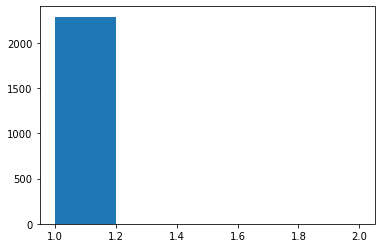

In [5]:
plt.hist(train_df[train_df['discourse_type']=='Lead'].groupby('essay_id')['discourse_type'].count().values, bins=5)

(array([3986.,    0.,    0.,    0.,   19.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 5 artists>)

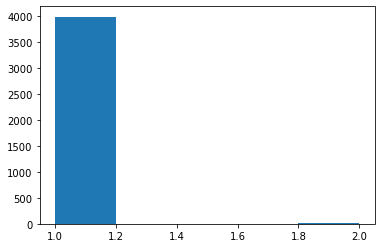

In [6]:
plt.hist(train_df[train_df['discourse_type']=='Position'].groupby('essay_id')['discourse_type'].count().values, bins=5)

(array([5.590e+02, 0.000e+00, 8.990e+02, 0.000e+00, 1.025e+03, 0.000e+00,
        5.590e+02, 0.000e+00, 2.150e+02, 0.000e+00, 0.000e+00, 4.300e+02,
        0.000e+00, 5.800e+01, 0.000e+00, 2.300e+01, 0.000e+00, 6.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

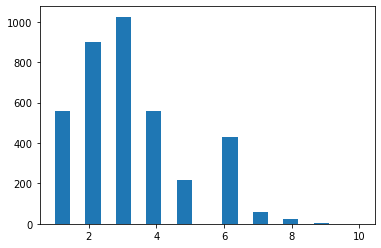

In [7]:
plt.hist(train_df[train_df['discourse_type']=='Claim'].groupby('essay_id')['discourse_type'].count().values, bins=20)

(array([ 590.,    0.,  945.,    0., 1531.,    0.,  693.,    0.,  263.,
           0.,   97.,    0.,   32.,    0.,    9.,    0.,    5.,    0.,
           0.,    2.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <BarContainer object of 20 artists>)

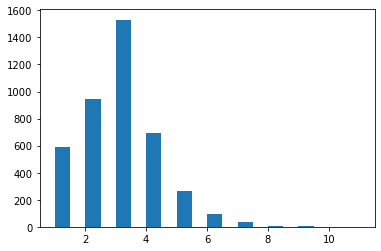

In [8]:
plt.hist(train_df[train_df['discourse_type']=='Evidence'].groupby('essay_id')['discourse_type'].count().values, bins=20)

(array([1.031e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.390e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <BarContainer object of 20 artists>)

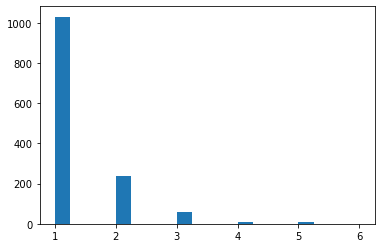

In [9]:
plt.hist(train_df[train_df['discourse_type']=='Counterclaim'].groupby('essay_id')['discourse_type'].count().values, bins=20)

(array([840.,   0.,   0.,   0.,   0., 138.,   0.,   0.,   0.,   0.,  31.,
          0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   3.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 20 artists>)

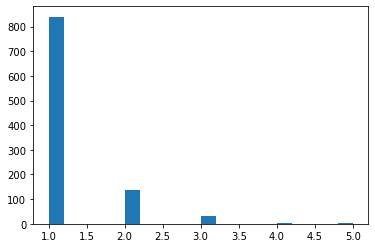

In [10]:
plt.hist(train_df[train_df['discourse_type']=='Rebuttal'].groupby('essay_id')['discourse_type'].count().values, bins=20)

(array([3313.,    0.,    0.,    0.,   19.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 5 artists>)

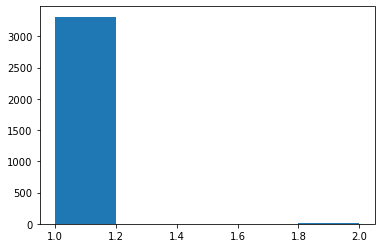

In [11]:
plt.hist(train_df[train_df['discourse_type']=='Concluding Statement'].groupby('essay_id')['discourse_type'].count().values, bins=5)

# Construct part of full text which includes discourse_text

In [12]:
unique_ids = sorted(train_df['essay_id'].unique())

In [19]:
from tqdm import tqdm

essay_df = []
for essay_id in tqdm(unique_ids):
    tmp_essay_df = train_df[train_df['essay_id']==essay_id].reset_index(drop=True)
    for i in range(len(tmp_essay_df)):
        tmp_df = tmp_essay_df.iloc[i]
        discourse_type = tmp_df['discourse_type']
        feature_text = []
        if discourse_type=='Lead':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin([''])].reset_index(drop=True)
        elif discourse_type=='Position':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin([''])].reset_index(drop=True)
        elif discourse_type=='Claim':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin(['Position'])].reset_index(drop=True)
        elif discourse_type=='Evidence':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin(['Claim'])].reset_index(drop=True)
        elif discourse_type=='Counterclaim':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin(['Position'])].reset_index(drop=True)
        elif discourse_type=='Rebuttal':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin(['Position', 'Counterclaim'])].reset_index(drop=True)
        elif discourse_type=='Concluding Statement':
            feature_df = tmp_essay_df[tmp_essay_df['discourse_type'].isin(['Position'])].reset_index(drop=True)

        for i_feat in range(len(feature_df)):
            feature_text.append(feature_df.loc[i_feat, 'discourse_text'])
        feature_text = '[SEP]'.join(feature_text)
        
        tmp_essay_df.loc[i,'feature_text'] = feature_text
    essay_df.append(tmp_essay_df)
    
essay_df = pd.concat(essay_df).reset_index(drop=True)
print('essay_df.shape = ', essay_df.shape)

100%|██████████████████████████████████████| 4191/4191 [00:27<00:00, 150.61it/s]


essay_df.shape =  (36765, 6)


In [20]:
essay_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,feature_text
0,fe6dfbd53216,00066EA9880D,Driverless cars are exaclty what you would exp...,Lead,Adequate,
1,ca9e1b60c9fb,00066EA9880D,The developement of these cars should be stopp...,Position,Effective,
2,6cf2157f4f19,00066EA9880D,the driver will be alerted when they will need...,Claim,Effective,The developement of these cars should be stopp...
3,d920880f4341,00066EA9880D,This is such a dangerous thing because we all ...,Evidence,Effective,the driver will be alerted when they will need...
4,7d52c3216a0e,00066EA9880D,Another thing that can go wrong with these car...,Claim,Effective,The developement of these cars should be stopp...


In [21]:
train_df = train_df.merge(essay_df[['discourse_id','feature_text']], on='discourse_id', how='left')

In [22]:
import os
os.makedirs('./result', exist_ok=True)
train_df.to_csv('./result/train.csv', index=False)

In [23]:
train_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,feature_text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,"On my perspective, I think that the face is a ..."
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,I think that the face is a natural landform be...
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,"On my perspective, I think that the face is a ..."
